In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
CBWs         = [6]
PBWs         = [24]
CWNDs        = [256]
TTIME        = 10
NUM_START    = 1
NUM_END      = 100
STEP         = 10
NUMEXP       = f"{NUM_START}-{NUM_END}"
TPTALGOs     = ['TCPreno','TCPcubic'] #,'UDP']
ATK_PARA     = range(NUM_START, NUM_END + 2, STEP)
hostnames    = ['atkr'] + [f'h{i}' for i in range(8)]
iperf_header = ['timestamp','src_addr','src_port','dest_addr','dest_port','transferID','interval','transferred_bytes','bits_per_second']

indices      = [('CBW', CBWs), ('PBW', PBWs), ('CWND', CWNDs), ('TPTALGO', TPTALGOs)]

basedir   = f'../results/NUMEXP-{NUMEXP}_TTIME-{TTIME}'

# unpacking loop to deal with xingyiz zip spam ANNOYING
# for CBW in CBWs:
#     for PBW in PBWs:
#         for CWND in CWNDs:
#             os.system(f'mkdir -p ./NUMEXP-{NUMEXP}_TTIME-{TTIME}/CBW-{CBW}/PBW-{PBW}/CWND-{CWND}K/')
#             os.system(f'unzip ../results/CBW-{CBW}_PBW-{PBW}_CWND-{CWND}K_NUMEXP-{NUMEXP}_TTIME-{TTIME}.zip')
#             os.system(f'mv ./CBW-{CBW}_PBW-{PBW}_CWND-{CWND}K_NUMEXP-{NUMEXP}_TTIME-{TTIME}/* ./NUMEXP-{NUMEXP}_TTIME-{TTIME}/CBW-{CBW}/PBW-{PBW}/CWND-{CWND}K/')
#             os.system(f'rmdir ./CBW-{CBW}_PBW-{PBW}_CWND-{CWND}K_NUMEXP-{NUMEXP}_TTIME-{TTIME}')

In [3]:
dfall = []
for CBW in CBWs:
    for PBW in PBWs:
        for CWND in CWNDs: 
            for TPTALGO in TPTALGOs:
                for APC in ATK_PARA:
                    for HOST in hostnames:
                        dfi = pd.read_csv(f'{basedir}/CBW-{CBW}/PBW-{PBW}/CWND-{CWND}K/{TPTALGO}/{APC}conn/iperf_{HOST}.csv', names=iperf_header)
                        dfi['host']    = HOST
                        dfi['APC']     = APC
                        dfi['TPTALGO'] = TPTALGO
                        dfi['CWND']    = CWND
                        dfi['PBW']     = PBW
                        dfi['CBW']     = CBW
                        dfall.append(dfi.tail(1))
                        
dfbigboi = pd.concat(dfall)
dfbigboi

,timestamp,src_addr,src_port,dest_addr,dest_port,transferID,interval,transferred_bytes,bits_per_second,host,APC,TPTALGO,CWND,PBW,CBW
10,20211123124552,10.0.0.1,56016,10.0.0.10,5001,3,0.0-10.0,5111696,4081700,atkr,1,TCPreno,256,24,6
10,20211123124552,10.0.0.5,58852,10.0.0.10,5001,3,0.0-10.1,5111696,4068919,h3,1,TCPreno,256,24,6
10,20211123124552,10.0.0.6,46808,10.0.0.10,5001,3,0.0-10.0,5111696,4073194,h4,1,TCPreno,256,24,6
10,20211123124552,10.0.0.7,39372,10.0.0.10,5001,3,0.0-10.1,5111696,4060444,h5,1,TCPreno,256,24,6
10,20211123124552,10.0.0.8,50204,10.0.0.10,5001,3,0.0-10.1,5111696,4057935,h6,1,TCPreno,256,24,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,20211123125040,10.0.0.5,33116,10.0.0.10,5001,3,0.0-10.5,4438264,3389665,h3,101,TCPcubic,256,24,6
10,20211123125040,10.0.0.6,49302,10.0.0.10,5001,3,0.0-10.2,5392440,4243194,h4,101,TCPcubic,256,24,6
10,20211123125040,10.0.0.7,41870,10.0.0.10,5001,3,0.0-10.4,5398232,4161426,h5,101,TCPcubic,256,24,6
10,20211123125040,10.0.0.8,52700,10.0.0.10,5001,3,0.0-10.0,4123208,3288858,h6,101,TCPcubic,256,24,6


In [4]:
df0 = dfbigboi[dfbigboi['APC'] == NUM_START]
# df0[df0['transport'] == ]

In [5]:
df0

,timestamp,src_addr,src_port,dest_addr,dest_port,transferID,interval,transferred_bytes,bits_per_second,host,APC,TPTALGO,CWND,PBW,CBW
10,20211123124552,10.0.0.1,56016,10.0.0.10,5001,3,0.0-10.0,5111696,4081700,atkr,1,TCPreno,256,24,6
10,20211123124552,10.0.0.5,58852,10.0.0.10,5001,3,0.0-10.1,5111696,4068919,h3,1,TCPreno,256,24,6
10,20211123124552,10.0.0.6,46808,10.0.0.10,5001,3,0.0-10.0,5111696,4073194,h4,1,TCPreno,256,24,6
10,20211123124552,10.0.0.7,39372,10.0.0.10,5001,3,0.0-10.1,5111696,4060444,h5,1,TCPreno,256,24,6
10,20211123124552,10.0.0.8,50204,10.0.0.10,5001,3,0.0-10.1,5111696,4057935,h6,1,TCPreno,256,24,6
10,20211123124552,10.0.0.9,40106,10.0.0.10,5001,3,0.0-10.0,5111696,4081098,h7,1,TCPreno,256,24,6
10,20211123124823,10.0.0.1,57376,10.0.0.10,5001,3,0.0-10.2,3027864,2366262,atkr,1,TCPcubic,256,24,6
10,20211123124823,10.0.0.2,56558,10.0.0.10,5001,3,0.0-10.2,4029880,3145444,h0,1,TCPcubic,256,24,6
10,20211123124823,10.0.0.3,48270,10.0.0.10,5001,3,0.0-10.2,3905304,3065894,h1,1,TCPcubic,256,24,6
10,20211123124823,10.0.0.4,50244,10.0.0.10,5001,3,0.0-10.2,3783040,2971595,h2,1,TCPcubic,256,24,6


In [6]:
for HOST in hostnames:
    print(HOST)

atkr
h0
h1
h2
h3
h4
h5
h6
h7


1 x 1	 CBW 	vs.   PBW


TypeError: 'AxesSubplot' object is not subscriptable

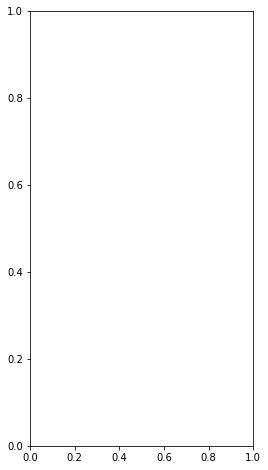

In [7]:
SCALAR_FIG_SZ = 4

for indeX in indices:
    for indeY in indices:
        if indices.index(indeX) == indices.index(indeY): continue
        AX_R_NAME, AX_R_VALS = indeX
        AX_C_NAME, AX_C_VALS = indeY
        AX_R_LEN , AX_C_LEN  = len(AX_R_VALS), len(AX_C_VALS)
        print(f'{AX_R_LEN} x {AX_C_LEN}\t', AX_R_NAME, '\tvs.  ', AX_C_NAME)
        
        fig, axs = plt.subplots(AX_R_LEN, AX_C_LEN, figsize=(AX_C_LEN*SCALAR_FIG_SZ, AX_R_LEN*SCALAR_FIG_SZ*2))
        
        maxY = 0
        for R_VAL in AX_R_VALS:
            df0 = dfbigboi[dfbigboi[AX_R_NAME] == R_VAL]
            for C_VAL in AX_C_VALS:
                df1 = df0[df0[AX_C_NAME] == C_VAL]
                axi = axs[AX_R_VALS.index(R_VAL)][AX_C_VALS.index(C_VAL)]
                
                net_data = [0] * len(ATK_PARA)
                for HOST in hostnames:
                    df2 = df1[df1['host'] == HOST]
                    host_data = []
                    for APC in ATK_PARA:
                        df3 = df2[df2['APC'] == APC]
                        host_total = df3.sum()['transferred_bytes'] // df3.shape[0]
                        host_data.append(host_total)
                        net_data[ATK_PARA.index(APC)] += host_total
                    maxY = max(maxY, max(host_data), max(net_data))
                    axi.plot(ATK_PARA, host_data, label=HOST)
                axi.plot(ATK_PARA, net_data, label='network')
                axi.legend()
                axi.set_xlabel('ATKR parallel conns')
                axi.set_ylabel('transferred_bytes')
                axi.set_title(f'{AX_R_NAME} {R_VAL} vs. {AX_C_NAME} {C_VAL}')
                
        for R_VAL in AX_R_VALS:
            for C_VAL in AX_C_VALS:
                axi = axs[AX_R_VALS.index(R_VAL)][AX_C_VALS.index(C_VAL)]
                axi.set_ylim(bottom=0, top=maxY)

        fig.savefig(f'VIZ_{AX_R_NAME}-{AX_C_NAME}.png', facecolor="w")

missing data points = 0
missing data points = 0


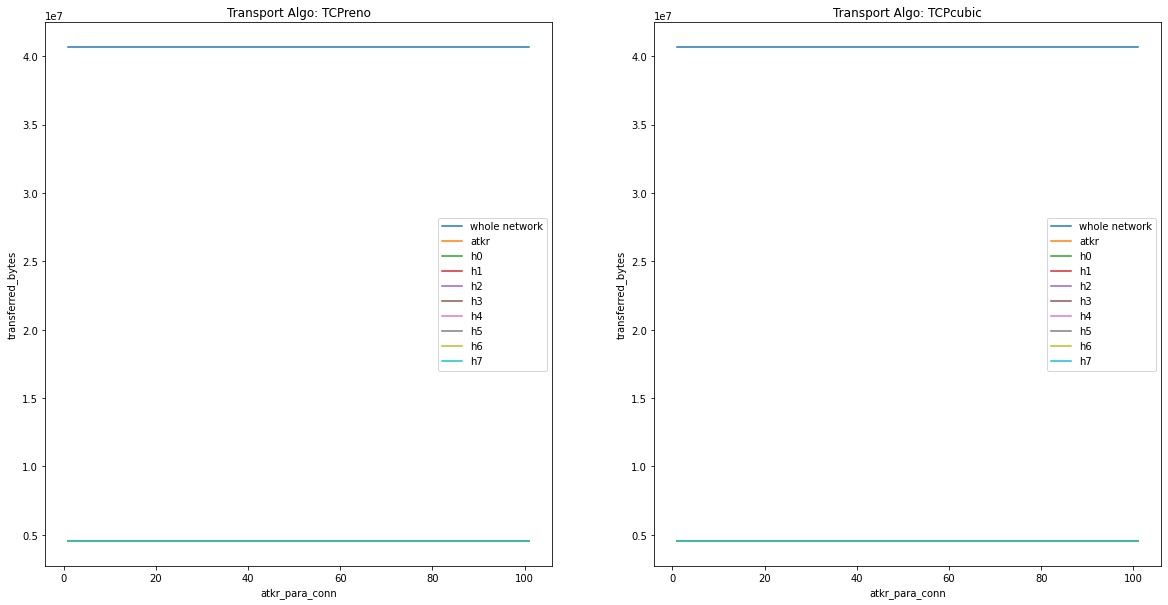

In [8]:
dfall = []
for host in hostnames:
    for atkr_para_conn in ATK_PARA:
        for tpt_algo in TPTALGOs:
            dfi = pd.read_csv(f'{basedir}/CBW-{CBW}/PBW-{PBW}/CWND-{CWND}K/{TPTALGO}/{APC}conn/iperf_{HOST}.csv', names=iperf_header)
            dfi['host'] = host
            dfi['transport'] = tpt_algo
            dfi['atkr_para_conn'] = atkr_para_conn
            dfall.append(dfi.tail(1))

dfbigboi = pd.concat(dfall)
dfbigboi

fig, axs = plt.subplots(1, len(TPTALGOs), figsize=(20,10))

for plti in range(len(TPTALGOs)):
    missing_data = 0
    tpt_algo = TPTALGOs[plti]
    x_axis = []
    bytes_tx = {}
    whole_net = []
    for apc in ATK_PARA:
        x_axis.append(apc)
        df0 = dfbigboi[dfbigboi['atkr_para_conn'] == apc]
        df1 = df0[df0['transport'] == tpt_algo]
        whole_net.append(0)
        for host in hostnames:
            if host not in bytes_tx:
                bytes_tx[host] = []
            try:
                bytes_tx[host].append(df1[df1['host'] == host]['transferred_bytes'].values[0])
            except:
                bytes_tx[host].append(-1)
                missing_data += 1

            # bytes_tx[host][-1] /= 8 * test_time
            whole_net[-1] += bytes_tx[host][-1]

    axs[plti].plot(x_axis, whole_net, label='whole network')
    for host in hostnames:
        axs[plti].plot(x_axis, bytes_tx[host], label=host)
    axs[plti].legend()
    axs[plti].set_xlabel('atkr_para_conn')
    axs[plti].set_ylabel('transferred_bytes')
    axs[plti].set_title(f'Transport Algo: {tpt_algo}')

    print(f'missing data points = {missing_data}')

missing data points = 1980


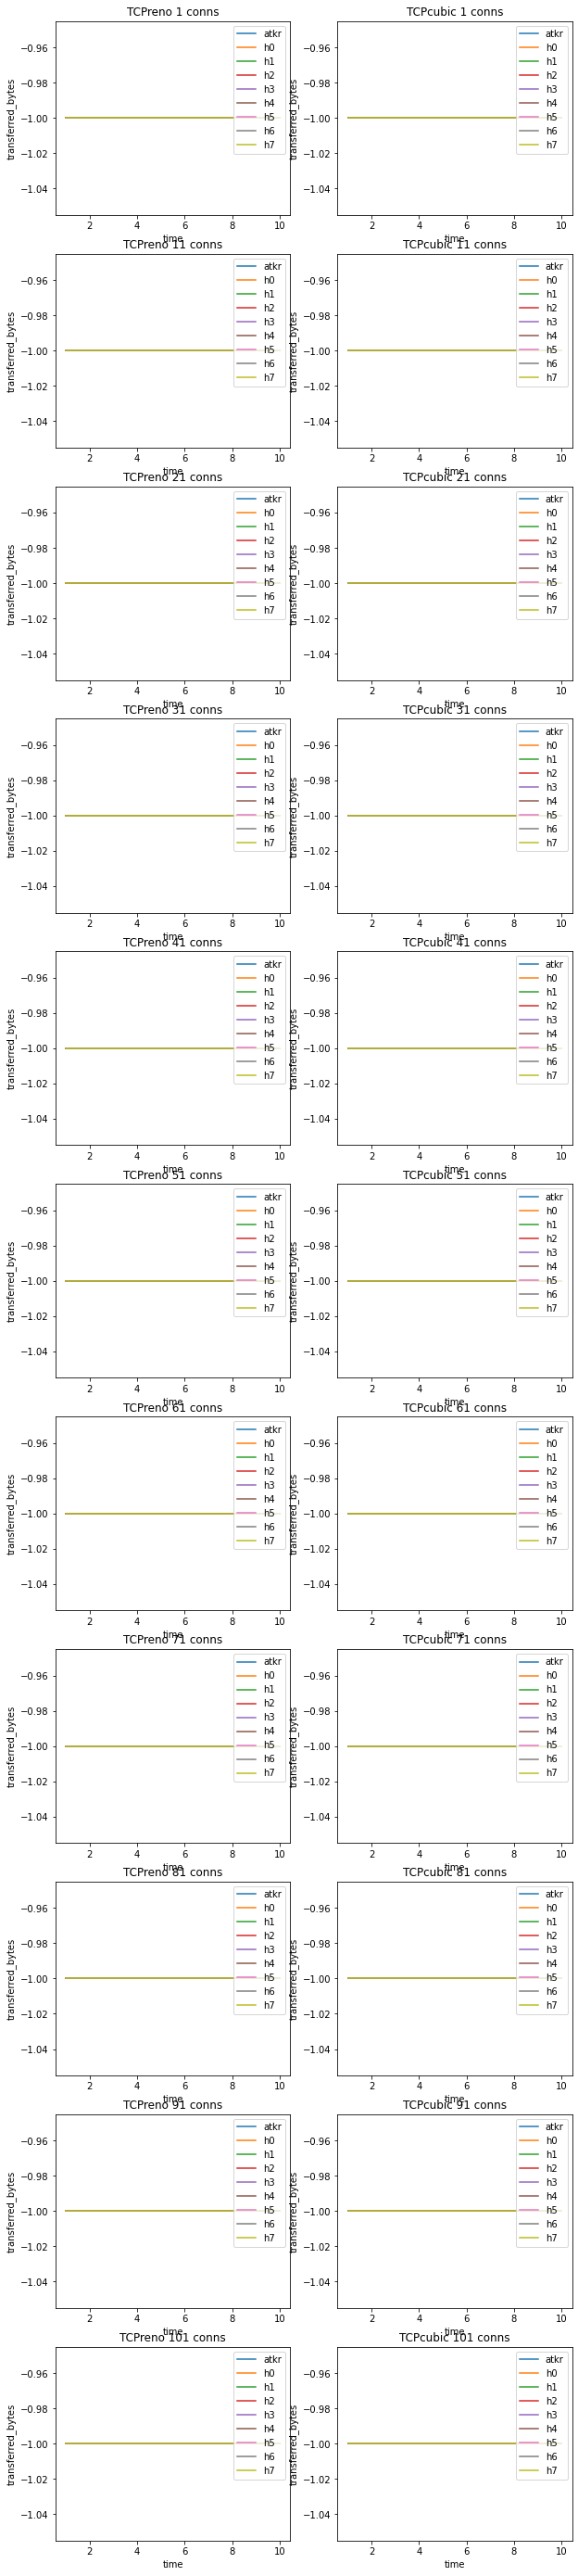

In [9]:
fig, axs = plt.subplots(len(ATK_PARA), len(TPTALGOs), figsize=(10, 5*10))
missing_data = 0
for apc in ATK_PARA:
    df0 = dfbigboi[dfbigboi['atkr_para_conn'] == apc]
    for tpt_algo in TPTALGOs:
        df1 = df0[df0['transport'] == tpt_algo]
        axi = axs[ATK_PARA.index(apc)][TPTALGOs.index(tpt_algo)]
        axi.set_title(f'{tpt_algo} {apc} conns')
        for host in hostnames:
            df2 = df1[df1['host'] == host]
            t_axis = []
            bytes_tx = []
            for t in range(TTIME):
                tint = f'{t:.1f}-{t+1:.1f}'
                df3 = df2[df2['interval'] == tint]
                if df3.shape[0] > 1:
                    df3 = df3[df3['transferID'] == -1]
                t_axis.append(t+1)
                try:
                    bytes_tx.append(df3['transferred_bytes'].values[0])
                except:
                    bytes_tx.append(-1)
                    missing_data += 1
                # if bytes_tx[-1] <= 0:
                #     bytes_tx[-1] = 1
            axi.plot(t_axis, bytes_tx, label=host)
        axi.legend()
        axi.set_xlabel('time')
        axi.set_ylabel('transferred_bytes')

print(f'missing data points = {missing_data}')